In [20]:
%matplotlib inline

In [21]:
import pandas as pd 
import os 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
import numpy as np

In [22]:
#File to load
csv_file = os.path.join(os.getcwd(), 'Resources','US_Accidents_Dec20_Updated.csv')

In [23]:
#Read csv file
accidents_df = pd.read_csv(csv_file)

In [24]:
#List columns for reference
accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [25]:
sun_df = accidents_df[["ID","Severity","Sunrise_Sunset"]]
sun_df

,ID,Severity,Sunrise_Sunset
0,A-1,2,Day
1,A-2,2,Day
2,A-3,2,Night
3,A-4,2,Day
4,A-5,3,Day
...,...,...,...
2906605,A-2906606,2,Day
2906606,A-2906607,2,Night
2906607,A-2906608,2,Day
2906608,A-2906609,2,Night


In [26]:
sunset = accidents_df['Sunrise_Sunset'].value_counts()

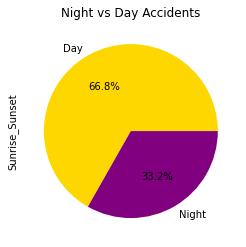

In [27]:
sunset.plot(kind = "pie", autopct= "%1.1f%%", colors= ("gold", "purple"), title= "Night vs Day Accidents")

plt.savefig("Images/Sunrise_Sunset.png")

In [28]:
#Create data frame with desired columns
trimmed_accidents_df = accidents_df[["ID","Severity","Start_Time"]]

In [29]:
#View new data frame
trimmed_accidents_df.head()

,ID,Severity,Start_Time
0,A-1,2,2019-05-21 08:29:55
1,A-2,2,2019-10-07 17:43:09
2,A-3,2,2020-12-13 21:53:00
3,A-4,2,2018-04-17 16:51:23
4,A-5,3,2016-08-31 17:40:49


In [30]:
#Converting the Start_Time column to date time format
trimmed_accidents_df['Start_Time'] = pd.to_datetime(trimmed_accidents_df['Start_Time'], format= "%Y-%m-%d %H:%M:%S")

<ipython-input-30-6f436278576d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_accidents_df['Start_Time'] = pd.to_datetime(trimmed_accidents_df['Start_Time'], format= "%Y-%m-%d %H:%M:%S")


In [31]:
#Create a column to represent the Hour of the day each accident happened
trimmed_accidents_df['Hour'] = trimmed_accidents_df['Start_Time'].dt.round('H').dt.hour
trimmed_accidents_df.head()

<ipython-input-31-59a8c760ee41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_accidents_df['Hour'] = trimmed_accidents_df['Start_Time'].dt.round('H').dt.hour


,ID,Severity,Start_Time,Hour
0,A-1,2,2019-05-21 08:29:55,8
1,A-2,2,2019-10-07 17:43:09,18
2,A-3,2,2020-12-13 21:53:00,22
3,A-4,2,2018-04-17 16:51:23,17
4,A-5,3,2016-08-31 17:40:49,18


In [32]:
trimmed_accidents_df = trimmed_accidents_df.copy()

In [33]:
#Dropping old Start_Time column
trimmed_accidents_df.drop(columns =["Start_Time"], inplace = True)

In [34]:
trimmed_accidents_df

,ID,Severity,Hour
0,A-1,2,8
1,A-2,2,18
2,A-3,2,22
3,A-4,2,17
4,A-5,3,18
...,...,...,...
2906605,A-2906606,2,9
2906606,A-2906607,2,2
2906607,A-2906608,2,13
2906608,A-2906609,2,23


In [35]:
trimmed_accidents_df['ID'] = trimmed_accidents_df['ID'].str.replace(r'\D', '').astype(int)


<ipython-input-35-bef435a7e000>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  trimmed_accidents_df['ID'] = trimmed_accidents_df['ID'].str.replace(r'\D', '').astype(int)


In [36]:
#Creating groups based on Hour
hour_grouped = trimmed_accidents_df.groupby('Hour')

#Count how many accidents per each Hour
count_per_hour = hour_grouped['Hour'].count()


In [37]:
#Set x axis and tick locations
x_axis = np.arange(len(trimmed_accidents_df["Hour"]))
tick_locations = [value for value in x_axis]

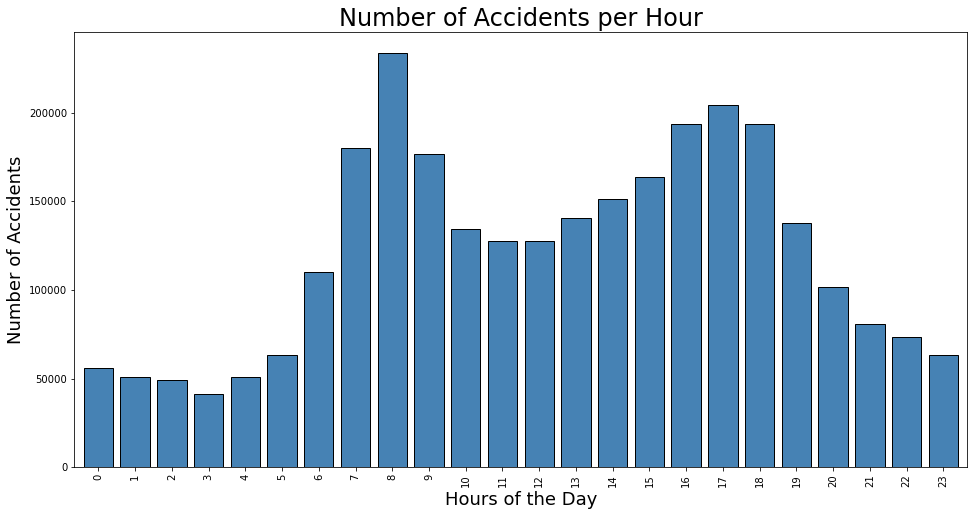

<Figure size 432x288 with 0 Axes>

In [75]:
#Create a bar chart based on the accidents per 
hour_chart = count_per_hour.plot(kind = 'bar', figsize=(16,8), alpha = 1, width = .8, color = "steelblue", edgecolor = "black")
#Set the x label and y label
hour_chart.set_xlabel("Hours of the Day", fontsize = 18)
hour_chart.set_ylabel("Number of Accidents", fontsize = 18)
hour_chart.set_title("Number of Accidents per Hour", fontsize = 24)
plt.show()

plt.savefig("Images/Number of Accidents per Hour.png")

In [68]:
severity_1 = trimmed_accidents_df.loc[trimmed_accidents_df.Severity==1]
severity_1_count = severity_1.groupby('Hour').count()['Severity']


In [40]:
severity_2 = trimmed_accidents_df.loc[trimmed_accidents_df.Severity==2]
severity_2_count = severity_2.groupby('Hour').count()['Severity']

In [41]:
severity_3 = trimmed_accidents_df.loc[trimmed_accidents_df.Severity==3]
severity_3_count = severity_3.groupby('Hour').count()['Severity']

In [42]:
severity_4 = trimmed_accidents_df.loc[trimmed_accidents_df.Severity==4]
severity_4_count = severity_4.groupby('Hour').count()['Severity']

In [67]:
severity_count= pd.DataFrame({"Severity 1": severity_1_count,"Severity 2": severity_2_count,"Severity 3": severity_3_count, "Severity 4": severity_4_count})


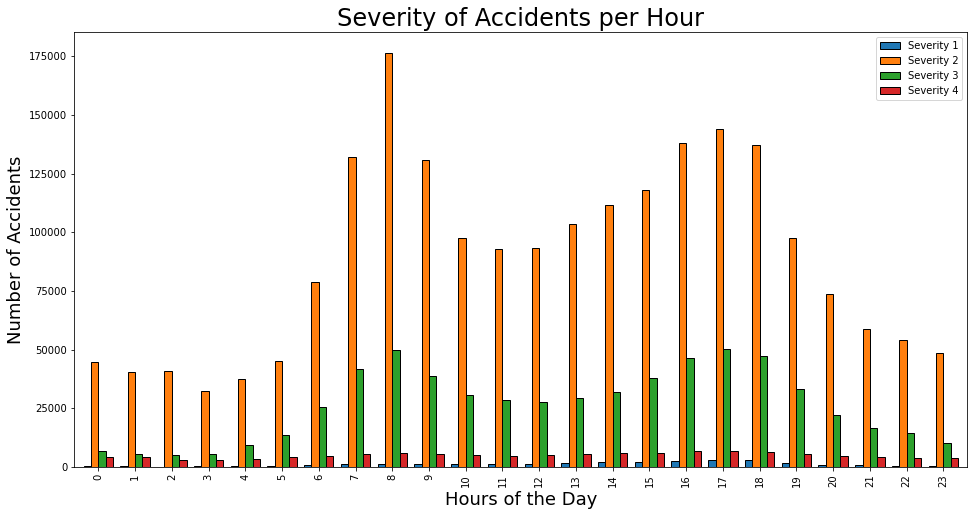

In [77]:
severity_count.plot(kind ="bar", figsize = (16, 8), width = .8, edgecolor = "black")
plt.xlabel("Hours of the Day", fontsize = 18)
plt.ylabel("Number of Accidents", fontsize = 18)
plt.title("Severity of Accidents per Hour", fontsize = 24)

plt.savefig("Images/Severity of Accidents per Hour.png")

In [45]:
severity_data = pd.merge(severity_1, severity_2, how ="outer", on = ["ID", "Hour"])

In [46]:
severity_data = pd.merge(severity_data, severity_3, how ="outer", on = ["ID", "Hour"])

In [47]:
severity_data = pd.merge(severity_data, severity_4, how ="outer", on = ["ID", "Hour"])

In [48]:
severity_data

,ID,Severity_x,Hour,Severity_y,Severity_x,Severity_y
0,57,1.0,17,NaN,NaN,NaN
1,104,1.0,19,NaN,NaN,NaN
2,158,1.0,3,NaN,NaN,NaN
3,340,1.0,10,NaN,NaN,NaN
4,578,1.0,17,NaN,NaN,NaN
...,...,...,...,...,...,...
2906605,2906550,NaN,0,NaN,NaN,4.0
2906606,2906555,NaN,19,NaN,NaN,4.0
2906607,2906569,NaN,4,NaN,NaN,4.0
2906608,2906578,NaN,16,NaN,NaN,4.0
